* What are the objectives of the project?

The objectives of this project are to analyze the relationship between independent and dependent vairables. In the selected dataset, we chose 3 independent
variables which are Gender, Age & Race and two dependent variables which are Manner of Deaths & Custody Status. The breakdowns are in the following:

1. Gender and manner of deaths(Suicide) as an output of "Suicide Death Rate by Gender". 
2. Age and manner of deaths(Natural) as an output of "Natural Death Rate by Age". 
3. Race and manner of deaths(Accidental) as an output of "Accidental Death rate by Race".  
4. Gender and custody status(Sentenced) as an output of "Sentenced Custody Status by Gender".
5. Age and custody status(Process of Arrest) as an output of "Process of Arrest Custody Status by Age".
6. Race and custody status(Booked - Awaiting Trial) as an output of "Booked - Awaiting Trial Custody Status by Race".

In [1]:
# Installing pandasql so sql can be integrated in python
!pip install pandasql

  Created wheel for pandasql: filename=pandasql-0.7.3-cp36-none-any.whl size=26820 sha256=c9cb5c0b935ee4afcacafae4ea8938c4e6ca01177f83f9fe9e8f1c85b7cce822
  Stored in directory: /root/.cache/pip/wheels/53/6c/18/b87a2e5fa8a82e9c026311de56210b8d1c01846e18a9607fc9
Successfully built pandasql


In [2]:
# All the dependencies libraries for data analysis & visulization
import pandas as pd
from google.colab import files 
import matplotlib.pyplot as plt
from pandasql import sqldf
import numpy as np

In [3]:
# Uploading the excel file to google colab
uploaded = files.upload()

Saving deaths-in-custody.csv to deaths-in-custody.csv


In [4]:
# Getting a snapshot of the dataset with pandas
df = pd.read_csv('deaths-in-custody.csv')
df.head()

,record_key_number,reporting_agency,agency_number,agency_full_name,county,race,gender,age,custody_status,custody_offense,date_of_death_yyyy,date_of_death_mm,date_of_death_dd,custodial_responsibilty_at_time_of_death,location_where_cause_of_death_occurred,facility_of_death,manner_of_death,means_of_death
0,2005001,State,27025C,Salinas Valley State Prison,Monterey,Other,Male,35,Sentenced,110,2005,1,3,CDC/CRC,Living,CDC/CRC,Suicide,"Hanging,Strangulation"
1,2005002,Police,390200,Lodi Police Department,San Joaquin,White,Male,67,Awaiting Booking,46,2005,1,5,City Jail,Living,City Jail,Natural,Not Applicable
2,2005003,State,48015C,California Medical Facility,Solano,White,Male,51,Sentenced,110,2005,1,6,CDC/CRC,Not Applicable,CDC/CRC,Natural,Not Applicable
3,2005004,State,15025C,Wasco State Prison,Kern,Hispanic,Male,50,Sentenced,501,2005,1,6,CDC/CRC,Not Applicable,Local Hospital,Natural,Not Applicable
4,2005005,State,34065C,"California State Prison, Sacramento",Sacramento,White,Male,53,Sentenced,800,2005,1,9,CDC/CRC,Not Applicable,Local Hospital,Natural,Not Applicable


In [5]:
# Getting manner_of_death column and getting the frequency of unique values
manner_of_death_count = sqldf('SELECT manner_of_death, COUNT(manner_of_death) FROM df GROUP BY manner_of_death')
manner_of_death_count

,manner_of_death,COUNT(manner_of_death)
0,Accidental,683
1,Cannot be Determined,115
2,Execution,1
3,Homicide Justified (Law Enforcement Staff),1269
4,Homicide Justified (Other Inmate),3
5,Homicide Willful (Law Enforcement Staff),4
6,Homicide Willful (Other Inmate),229
7,Natural,4935
8,Other,28
9,Pending Investigation,250


**As we can see the output of manner_of_death_count that Accidental, Natural and Suicide deaths have the highest frequency. So these values shall be used in the analysis.**

In [6]:
# Breaking down Suicide manner of death by gender
gender_death_rate_by_suicide = sqldf('SELECT gender,COUNT(manner_of_death) AS suicide_count FROM df WHERE manner_of_death = "Suicide" GROUP BY gender')
gender_death_rate_by_suicide

,gender,suicide_count
0,Female,58
1,Male,798


In [7]:
# Calculating the percentage of suicide rate by gender
female_death_rate_by_suicide = gender_death_rate_by_suicide['suicide_count'][0]
percentage_female_death_rate_by_suicide = ((female_death_rate_by_suicide / 856) * 100).round(2)
male_death_rate_by_suicide = (gender_death_rate_by_suicide['suicide_count'][1])
percentage_male_death_rate_by_suicide = ((male_death_rate_by_suicide / 856) * 100).round(2)

In [8]:
# Using numpy to assign values to an array for x axis in the graph
gender = ["Female", "Male"]
ypos_gender = np.arange(len(gender))

Text(0, 0.5, 'Suicide Rate')

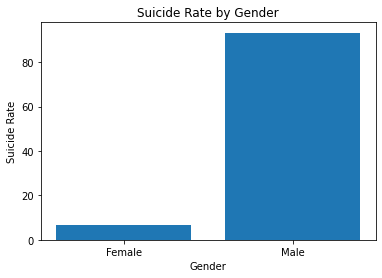

In [9]:
# Creating a visulization from the analysis of Suicide Rate by Gender
plt.bar(range(2),(percentage_female_death_rate_by_suicide, percentage_male_death_rate_by_suicide))
plt.title("Suicide Rate by Gender")
plt.xticks(ypos_gender,gender)
plt.xlabel("Gender")
plt.ylabel("Suicide Rate")

As shown in the graph above female's suicide rate is 6.78% and male's suicide rate is 93.22%. So, it shows that male's suicide rate is way higher comparing to female's suicide rate.

In [10]:
# Minimum age in the dataset
df['age'].min()

'13'

In [11]:
# Maximum age in the dataset
df['age'].max()

'Unk'

In [12]:
# Replacing the "Unk" value with the average of the "age" column
df['age'] = df['age'].replace(['Unk'], '55')

In [13]:
# Updated value of maximum age in the dataset
df['age'].max()

'97'

The raw data for age has the maximum value of 'Unk' which cannot be analyzed numerically, that is why it is replaced by the average value of the age.

In [14]:
# Breaking down into percentage for the age column from age 13 to 30 for natural manner of death
_13_to_30_natural_death = sqldf('SELECT age, COUNT(manner_of_death) FROM df WHERE age < 31 AND manner_of_death = "Natural" GROUP BY age')
sum_13_to_30_natural_death = _13_to_30_natural_death['COUNT(manner_of_death)'].sum()
percentage_13_to_30_natural_death = ((sum_13_to_30_natural_death / 4935) * 100).round(2)

In [15]:
percentage_13_to_30_natural_death

3.51

In [16]:
# Breaking down into percentage the age column from age 31 to 50 for natural manner of death
_31_to_50_natural_death = sqldf('SELECT age, COUNT(manner_of_death) FROM df WHERE age > 30 AND age < 51 AND manner_of_death = "Natural" GROUP BY age')
sum_31_to_50_natural_death = _31_to_50_natural_death['COUNT(manner_of_death)'].sum()
percentage_31_to_50_natural_death = ((sum_31_to_50_natural_death / 4935) * 100).round(2)

In [17]:
# Breaking down into percentage the age column from age  51 to 70 for natural manner of death
_51_to_70_natural_death = sqldf('SELECT age, COUNT(manner_of_death) FROM df WHERE age > 50 AND age < 71 AND manner_of_death = "Natural" GROUP BY age')
sum_51_to_70_natural_death = _51_to_70_natural_death['COUNT(manner_of_death)'].sum()
percentage_51_to_70_natural_death = ((sum_51_to_70_natural_death / 4935) * 100).round(2)

In [18]:
# Breaking down into percentage the age column from age 71 to 97 for natural manner of death
_71_to_97_natural_death = sqldf('SELECT age, COUNT(manner_of_death) FROM df WHERE age > 70 AND manner_of_death = "Natural" GROUP BY age')
sum_71_to_97_natural_death = _71_to_97_natural_death['COUNT(manner_of_death)'].sum()
percentage_71_to_97_natural_death = ((sum_71_to_97_natural_death / 4935) * 100).round(2)

In [19]:
# Using numpy to assign values to an array for x axis in the graph
age_count = ["13 to 30", "31 to 50", "51 to 70", "71 to 97"]
ypos_ages_count = np.arange(len(age_count))

Text(0, 0.5, 'Natural Death Rate')

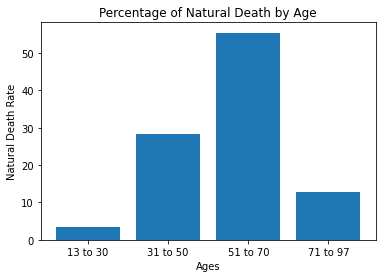

In [20]:
# Creating a visulization from the analysis of Natural Death Rate by Age
plt.bar(range(4),(percentage_13_to_30_natural_death,percentage_31_to_50_natural_death,percentage_51_to_70_natural_death,percentage_71_to_97_natural_death))
plt.title("Percentage of Natural Death by Age")
plt.xticks(ypos_ages_count, age_count)
plt.xlabel("Ages")
plt.ylabel("Natural Death Rate")

From the graph above, it is shown that the highest natural death rate is from age 51 to 70 which is 55.42% and the lowest natural death rate is from age 13 to 30 which is 3.51%. So, the youngest population tends to have less natural death compare to the older population.

In [21]:
# Query race and the count of race column by using SQL
count_of_race = sqldf("SELECT race, COUNT(race) FROM df GROUP BY race")
count_of_race

,race,COUNT(race)
0,American Indian,80
1,Asian Indian,18
2,Black,1972
3,Cambodian,5
4,Chinese,15
5,Filipino,55
6,Guamanian,3
7,Hawaiian,1
8,Hispanic,2494
9,Japanese,4


In [22]:
# Query race and the count of manner of death for Accidental column by using SQL
accidental_death_by_race = sqldf("SELECT race, COUNT(manner_of_death) AS 'Accidental Death Count' FROM df WHERE manner_of_death = 'Accidental' GROUP BY race")
accidental_death_by_race

,race,Accidental Death Count
0,American Indian,6
1,Black,142
2,Cambodian,1
3,Chinese,2
4,Filipino,1
5,Guamanian,1
6,Hispanic,247
7,Laotian,1
8,Other,7
9,Other Asian,6


In [23]:
# Summing up the accidental death count
sum_of_accidental_death = accidental_death_by_race["Accidental Death Count"].sum()

In [24]:
# Creating variables for top 5 individual frequency of race
white_death_by_accidental = accidental_death_by_race['Accidental Death Count'][11]
hispanic_death_by_accidental = accidental_death_by_race['Accidental Death Count'][6]
black_death_by_accidental = accidental_death_by_race['Accidental Death Count'][1]
other_death_by_accidental = accidental_death_by_race['Accidental Death Count'][8]
american_indian_death_by_accidental = accidental_death_by_race['Accidental Death Count'][0]

In [25]:
# Calculating the percentage for top 5 individual frequency of race
percentage_white_death_by_accidental = ((white_death_by_accidental / sum_of_accidental_death) * 100).round(2)
percentage_hispanic_death_by_accidental = ((hispanic_death_by_accidental / sum_of_accidental_death) * 100).round(2)
percentage_black_death_by_accidental = ((black_death_by_accidental / sum_of_accidental_death) * 100).round(2)
percentage_other_death_by_accidental = ((other_death_by_accidental / sum_of_accidental_death) * 100).round(2)
percentage_american_indian_death_by_accidental = ((american_indian_death_by_accidental / sum_of_accidental_death) * 100).round(2)

In [26]:
# Using numpy to assign values to an array for x axis in the graph
races = ["White", "Hispanic", "Black", "Other", "American Indian"]
ypos_races = np.arange(len(races))

Text(0, 0.5, 'Accidental Death Rate')

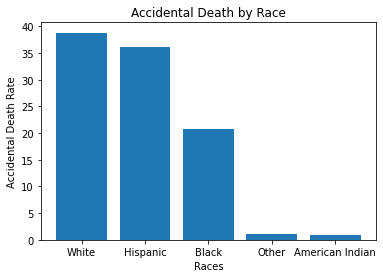

In [27]:
# Creating a visulization from the analysis of Accidental Death Rate by Race
plt.bar(range(5),(percentage_white_death_by_accidental,percentage_hispanic_death_by_accidental,percentage_black_death_by_accidental,percentage_other_death_by_accidental,percentage_american_indian_death_by_accidental))
plt.title("Accidental Death by Race")
plt.xlabel("Races")
plt.xticks(ypos_races, races)
plt.ylabel("Accidental Death Rate")

From the graph shown above, the highest accidental death rate is white which is 38.8% and the lowest from the top 5 population accidental death rate is American Indian which is 0.88%.

In [28]:
# Query custody status and the count of custody status by using SQL
count_custody_status = sqldf("SELECT custody_status, COUNT(custody_status) FROM df GROUP BY custody_status")
count_custody_status

,custody_status,COUNT(custody_status)
0,Awaiting Booking,97
1,Booked - Awaiting Trial,1031
2,Booked - No Charges Filed,203
3,In Transit,33
4,Other,198
5,Out to Court,14
6,Process of Arrest,1602
7,Sentenced,5195


In [29]:
# Query gender and the count of Sentenced Custody Status by using SQL
sentenced_custody_status_by_gender = sqldf("SELECT gender, COUNT(custody_status) AS 'Custody Status Count' FROM df WHERE custody_status = 'Sentenced' GROUP BY gender")
sentenced_custody_status_by_gender

,gender,Custody Status Count
0,Female,234
1,Male,4961


In [30]:
# Calculating the percentage of Senteced Custody Status by Gender
sum_sentenced_custody_status_by_gender = sentenced_custody_status_by_gender['Custody Status Count'].sum()
female_sentenced_custody_status_by_gender = sentenced_custody_status_by_gender['Custody Status Count'][0]
male_sentenced_custody_status_by_gender = sentenced_custody_status_by_gender['Custody Status Count'][1]
percentage_female_sentenced_custody_status_by_gender = ((female_sentenced_custody_status_by_gender / sum_sentenced_custody_status_by_gender) * 100).round(2)
percentage_male_sentenced_custody_status_by_gender = ((male_sentenced_custody_status_by_gender / sum_sentenced_custody_status_by_gender) * 100).round(2)

Text(0, 0.5, 'Sentenced Custody Status Rate')

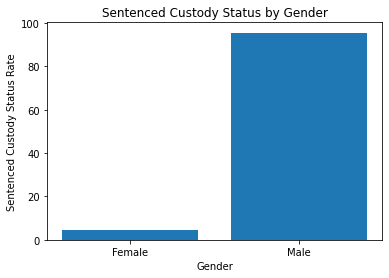

In [31]:
# Creating a visulization from the analysis of Sentenced Custody Status by Gender
plt.bar(range(2),(percentage_female_sentenced_custody_status_by_gender, percentage_male_sentenced_custody_status_by_gender))
plt.title("Sentenced Custody Status by Gender")
plt.xlabel("Gender")
plt.xticks(ypos_gender, gender)
plt.ylabel("Sentenced Custody Status Rate")

As shown in the graph above Senteced Custody Status rate for female is 4.50% and male is 95.50%. So, it shows that male's Sentenced Custody Status is way higher comparing to female's suicide rate.

In [32]:
# Qurey the age and Count of Process of Arrest in Custody Status by Age
age_process_of_arrest = sqldf('SELECT age, COUNT(custody_status) FROM df WHERE custody_status = "Process of Arrest" GROUP BY age')

In [33]:
# Summing the total Process of Arrest in Custody Status by Age
sum_age_process_of_arrest = age_process_of_arrest['COUNT(custody_status)'].sum()

In [34]:
# Breaking down into percentage for the age column from age 13 to 30 for Process of Arrest in Custody Status
_13_to_30_process_of_arrest = sqldf('SELECT age, COUNT(custody_status) FROM df WHERE age < 31 AND custody_status = "Process of Arrest" GROUP BY age')
sum_13_to_30_process_of_arrest = _13_to_30_process_of_arrest['COUNT(custody_status)'].sum()
percentage_13_to_30_process_of_arrest = ((sum_13_to_30_process_of_arrest / sum_age_process_of_arrest) * 100).round(2)

In [35]:
# Breaking down into percentage for the age column from age 31 to 50 for Process of Arrest in Custody Status
_31_to_50_process_of_arrest = sqldf('SELECT age, COUNT(custody_status) FROM df WHERE age > 30 AND age < 51 AND custody_status = "Process of Arrest" GROUP BY age')
sum_31_to_50_process_of_arrest = _31_to_50_process_of_arrest['COUNT(custody_status)'].sum()
percentage_31_to_50_process_of_arrest = ((sum_31_to_50_process_of_arrest / sum_age_process_of_arrest) * 100).round(2)

In [36]:
# Breaking down into percentage for the age column from age 51 to 70 for Process of Arrest in Custody Status
_51_to_70_process_of_arrest = sqldf('SELECT age, COUNT(custody_status) FROM df WHERE age > 50 AND age < 71 AND custody_status = "Process of Arrest" GROUP BY age')
sum_51_to_70_process_of_arrest = _51_to_70_process_of_arrest['COUNT(custody_status)'].sum()
percentage_51_to_70_process_of_arrest = ((sum_51_to_70_process_of_arrest / sum_age_process_of_arrest) * 100).round(2)

In [37]:
# Breaking down into percentage for the age column from age 71 to 97 for Process of Arrest in Custody Status
_71_to_97_process_of_arrest = sqldf('SELECT age, COUNT(custody_status) FROM df WHERE age > 71 AND custody_status = "Process of Arrest" GROUP BY age')
sum_71_to_97_process_of_arrest = _71_to_97_process_of_arrest['COUNT(custody_status)'].sum()
percentage_71_to_97_process_of_arrest = ((sum_71_to_97_process_of_arrest / sum_age_process_of_arrest) * 100).round(2)

Text(0, 0.5, 'Process of Arrest Rate')

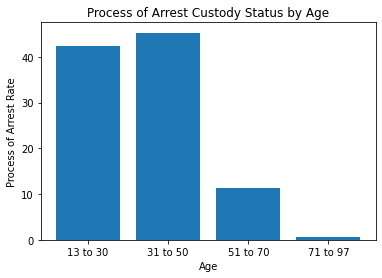

In [38]:
# Creating a visulization from the analysis of Process of Arrest in Custody Status by Age
plt.bar(range(4),(percentage_13_to_30_process_of_arrest, percentage_31_to_50_process_of_arrest, percentage_51_to_70_process_of_arrest, percentage_71_to_97_process_of_arrest))
plt.title("Process of Arrest Custody Status by Age")
plt.xlabel("Age")
plt.xticks(ypos_ages_count, age_count)
plt.ylabel("Process of Arrest Rate")

From the graph above, it is shown that the highest Process of Arrest in Custody Status rate is from age 31 to 50 which is 42.45% and the lowest natural death rate is from age 71 to 97 which is 0.69%. So, the older population tends to have less Process of Arresnt in Custody Status compare to the younger population.

In [40]:
# Query race and the count of Custody Status for Booked - Awaiting Trial by using SQL
booked_awaiting_trail_custody_status_by_race = sqldf('SELECT race, COUNT(custody_status) FROM df WHERE custody_status = "Booked - Awaiting Trial" GROUP BY race')
booked_awaiting_trail_custody_status_by_race

,race,COUNT(custody_status)
0,American Indian,6
1,Asian Indian,9
2,Black,211
3,Cambodian,1
4,Chinese,6
5,Filipino,6
6,Hawaiian,1
7,Hispanic,286
8,Japanese,1
9,Korean,1


In [42]:
# Summing up the Booked Awaiting Trial custody status count
sum_of_booked_awaiting_trial = booked_awaiting_trail_custody_status_by_race['COUNT(custody_status)'].sum()

In [43]:
# Creating variables for top 5 individual frequency of race
white_booked_awaiting_trial = booked_awaiting_trail_custody_status_by_race['COUNT(custody_status)'][15]
hispanic_booked_awaiting_trial = booked_awaiting_trail_custody_status_by_race['COUNT(custody_status)'][7]
black_booked_awaiting_trial = booked_awaiting_trail_custody_status_by_race['COUNT(custody_status)'][2]
other_asian_booked_awaiting_trial = booked_awaiting_trail_custody_status_by_race['COUNT(custody_status)'][12]
asian_indian_booked_awaiting_trial = booked_awaiting_trail_custody_status_by_race['COUNT(custody_status)'][1]                                                                                                                   

In [44]:
# Calculating the percentage for top 5 individual frequency of race
percentage_white_booked_awaiting_trial = ((white_booked_awaiting_trial / sum_of_booked_awaiting_trial) * 100).round(2) 
percentage_hispanic_booked_awaiting_trial = ((hispanic_booked_awaiting_trial / sum_of_booked_awaiting_trial) * 100).round(2) 
percentage_black_booked_awaiting_trial = ((black_booked_awaiting_trial / sum_of_booked_awaiting_trial) * 100).round(2) 
percentage_other_asian_booked_awaiting_trial = ((other_asian_booked_awaiting_trial / sum_of_booked_awaiting_trial) * 100).round(2) 
percentage_asian_indian_booked_awaiting_trial = ((asian_indian_booked_awaiting_trial / sum_of_booked_awaiting_trial) * 100).round(2)                                                                                                                    

In [45]:
# Using numpy to assign values to an array for x axis in the graph
races_booked_awaiting_trial = ["White", "Hispanic", "Black", "Other Asian", "Asian Indian"]
y_pos_races_booked_awaiting_trial = np.arange(len(races_booked_awaiting_trial))

Text(0, 0.5, 'Booked Awaiting Trial Rate')

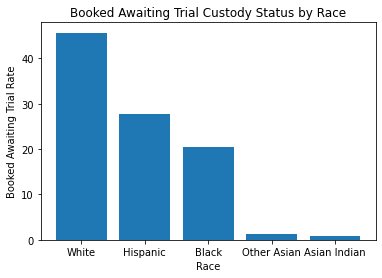

In [47]:
# Creating a visulization from the analysis of Booked Awating Trial Rate by Race
plt.bar(range(5),(percentage_white_booked_awaiting_trial, percentage_hispanic_booked_awaiting_trial, percentage_black_booked_awaiting_trial, percentage_other_asian_booked_awaiting_trial, percentage_asian_indian_booked_awaiting_trial))
plt.title("Booked Awaiting Trial Custody Status by Race")
plt.xlabel("Race")
plt.xticks(y_pos_races_booked_awaiting_trial, races_booked_awaiting_trial)
plt.ylabel("Booked Awaiting Trial Rate")

From the graph shown above, the highest Booked - Awaiting Trial for custody status rate is White which is 45.68% and the lowest from the top 5 population of Booked - Awaiting Trial for custody status is Asian Indian which is 0.87%.

Summary:

1. Suicide Death Rate by Gender: Male tends to have higher suicide death rate comapre to female.
2. Natural Death Rate by Age: The youngest population tends to have less natural death compare to the older population.
3. Accidental Death Rate by Race: From the top 5 highest frequency of accidental death rate by race, White has the highest death rate and American Indian has the lowest death rate.
4. Sentenced Custody Status by Gender: Male tends to have higher sentenced sustody status rate compare to female.
5. Process of Arrest Custody Status by Age: The older population tends to have less Process of Arresnt in Custody Status compare to the younger population.
6. Booked Awaiting Trial Custody Status by Race: From the top 5 highest frequency of Booked Awaiting Trial Custody Status rate by race, White has the highest trial rate and Asian Indian has the lowest trial rate.